The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window

alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window

day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.

temperature: temperature at that time in degrees F

hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df2 = pd.read_csv('capmetro_UT.csv')
df2


,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend
...,...,...,...,...,...,...,...,...
5819,2018-11-30 20:45:00,43,29,Fri,70.73,20,Nov,weekday
5820,2018-11-30 21:00:00,24,19,Fri,69.88,21,Nov,weekday
5821,2018-11-30 21:15:00,33,16,Fri,69.88,21,Nov,weekday
5822,2018-11-30 21:30:00,25,15,Fri,69.88,21,Nov,weekday


<ipython-input-2-21e0ff9f122e>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_by_day = df2.groupby('day_of_week').apply(calc_corr)


day_of_week
Monday       0.118191
Tuesday      0.291193
Wednesday    0.401395
Thursday     0.398561
Friday       0.427850
Saturday     0.245775
Sunday       0.208560
dtype: float64


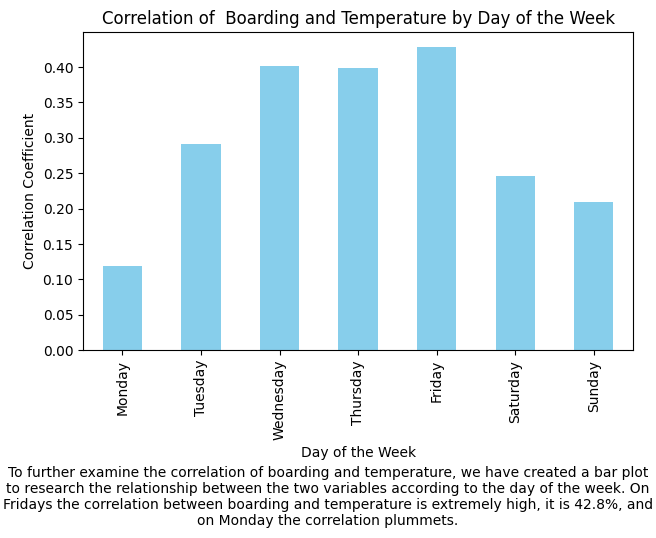

In [2]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])


df2['day_of_week'] = df2['timestamp'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


df2['day_of_week'] = pd.Categorical(df2['day_of_week'], categories=day_order, ordered=True)

def calc_corr(group):
   return group['boarding'].corr(group['temperature'])


correlation_by_day = df2.groupby('day_of_week').apply(calc_corr)

print(correlation_by_day)


correlation_by_day.plot(kind='bar', color='skyblue')
plt.title('Correlation of  Boarding and Temperature by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Correlation Coefficient')
caption_text = ("To further examine the correlation of boarding and temperature, we have created a bar plot to research the relationship "
"between the two variables according to the day of the week. On Fridays the correlation between boarding and temperature is extremely high, "
"it is 42.8%, and on Monday the correlation plummets.")
plt.figtext(0.5, -0.1, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-3-c086d24767e0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df2.groupby('day_of_week').agg({


              boarding  temperature
day_of_week                        
Monday       67.872596    66.752837
Tuesday      71.110577    67.899712
Wednesday    67.866587    69.280625
Thursday     65.131010    67.885048
Friday       61.389423    70.424327
Saturday     15.054087    72.194567
Sunday       12.157452    70.540192


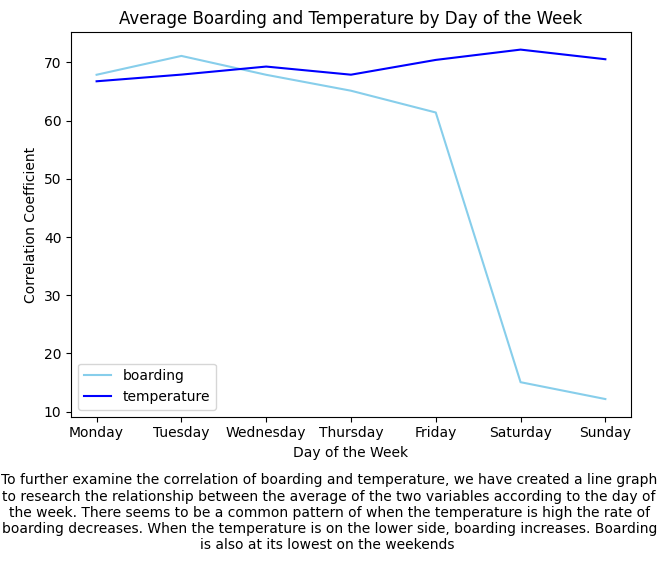

In [3]:
mean_values = df2.groupby('day_of_week').agg({
    'boarding': 'mean',
    'temperature': 'mean'
})

print(mean_values)

mean_values.plot(kind='line', color=['skyblue','blue'])
plt.title('Average Boarding and Temperature by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Correlation Coefficient')

caption_text = ("To further examine the correlation of boarding and temperature, we have created a line graph to research the relationship "
"between the average of the two variables according to the day of the week. There seems to be a common pattern of when the temperature is high the rate of boarding decreases. When the temperature is on the lower side, boarding increases. Boarding is also at its lowest on the weekends ")
plt.figtext(0.5, -0.15, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()

              boarding  temperature
hour_of_day                        
6             4.458791    62.089451
7            11.695055    61.938022
8            17.395604    62.255055
9            24.247253    64.191868
10           35.271978    66.702527
11           41.535714    69.211648
12           57.848901    71.498242
13           59.230769    73.251099
14           75.659341    74.492857
15           96.464286    74.904835
16           99.178571    74.991978
17           96.563187    74.369121
18           76.005495    72.727253
19           54.939560    70.408352
20           40.359890    68.411319
21           33.332418    67.075934


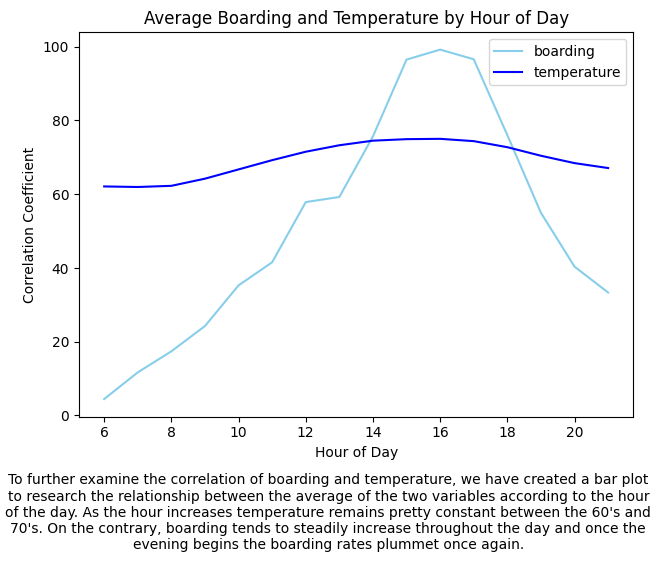

In [4]:
mean_values = df2.groupby('hour_of_day').agg({
    'boarding': 'mean',
    'temperature': 'mean'
})

print(mean_values)

mean_values.plot(kind='line', color=['skyblue','blue'])
plt.title('Average Boarding and Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Correlation Coefficient')
caption_text = ("To further examine the correlation of boarding and temperature, we have created a bar plot to research the relationship "
"between the average of the two variables according to the hour of the day. As the hour increases temperature remains pretty constant between the 60's and 70's. On the contrary, boarding tends to steadily increase throughout the day and once the evening begins the boarding rates plummet once again.")
plt.figtext(0.5, -0.15, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

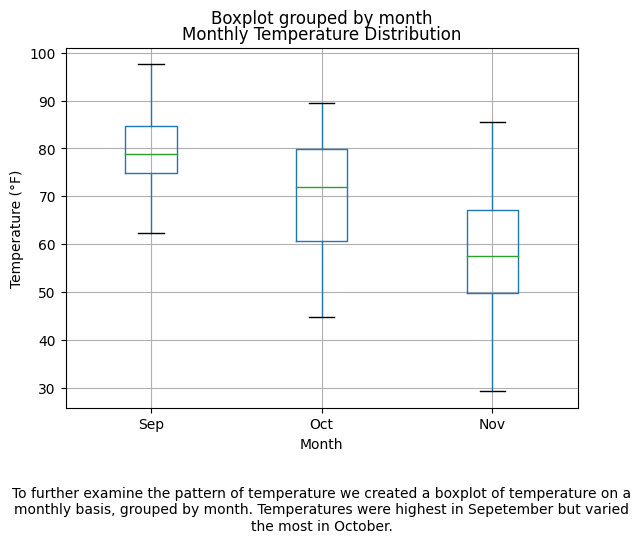

In [5]:


df2['timestamp'] = pd.to_datetime(df2['timestamp'])


df2['month'] = df2['timestamp'].dt.month_name().str[:3]

df2['month'] = pd.Categorical(df2['month'], categories=['Sep', 'Oct', 'Nov'], ordered=True)

plt.figure(figsize=(10, 6))
df2.boxplot(column='temperature', by='month')
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
caption_text = ("To further examine the pattern of temperature we created a boxplot of temperature on a monthly basis, grouped by month. Temperatures were highest in Sepetember but varied the most in October.")
plt.figtext(0.5, -0.1, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

<ipython-input-6-40d31345c0d7>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_temp_by_month = df2.groupby('month')['temperature'].mean()


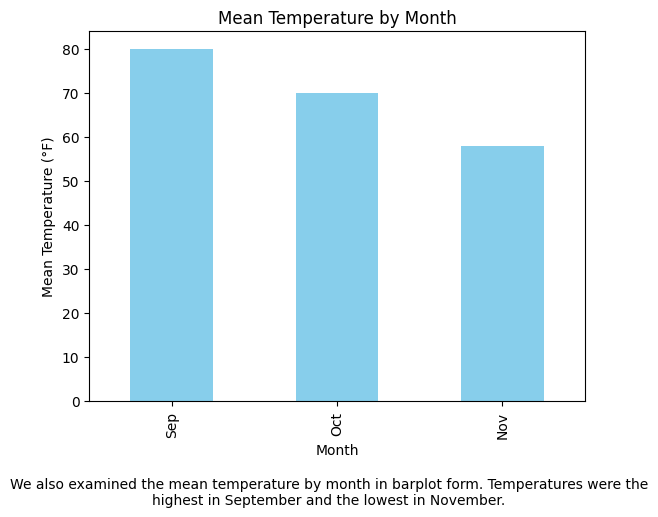

In [6]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])


df2['month'] = df2['timestamp'].dt.month_name().str[:3]

df2['month'] = pd.Categorical(df2['month'], categories=['Sep', 'Oct', 'Nov'], ordered=True)

mean_temp_by_month = df2.groupby('month')['temperature'].mean()
mean_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Mean Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°F)')
caption_text = ("We also examined the mean temperature by month in barplot form. Temperatures were the highest in September and the lowest in November.")
plt.figtext(0.5, -0.1, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

hour_of_day
6     0.466705
7     0.891010
8     0.833690
9     0.811493
10    0.767192
11    0.783477
12    0.753421
13    0.795198
14    0.876115
15    0.817926
16    0.829084
17    0.791504
18    0.731872
19    0.500659
20    0.408193
21    0.261859
dtype: float64


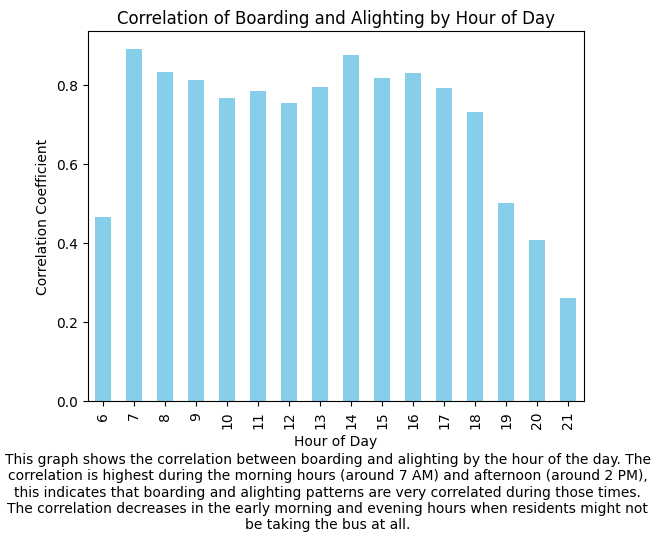

In [7]:
def calc_corr(group):
    return group['boarding'].corr(group['alighting'])


correlation_by_hour = df2.groupby('hour_of_day').apply(calc_corr)

print(correlation_by_hour)

import matplotlib.pyplot as plt


correlation_by_hour.plot(kind='bar', color='skyblue')
plt.title('Correlation of Boarding and Alighting by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Correlation Coefficient')
caption_text = ("This graph shows the correlation between boarding and alighting by the hour of the day. The correlation is highest during the morning hours (around 7 AM) and afternoon (around 2 PM), this indicates that boarding and alighting patterns are very correlated during those times. The correlation decreases in the early morning and evening hours when residents might not be taking the bus at all.")
plt.figtext(0.5, -0.15, caption_text, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()